In [2]:
# Manejo de datos y graficación 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
archivo_csv = r"C:\Users\Nicolas\Desktop\Proyecto Analitica Compu\datos proyect.csv"
df = pd.read_csv(archivo_csv)

# Verifica que los datos se hayan cargado correctamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   RentedBikeCount            8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature(C)             8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Windspeed(m/s)             8465 non-null   float64
 6   Visibility(10m)            8465 non-null   int64  
 7   Dewpointtemperature(C)     8465 non-null   float64
 8   SolarRadiation(MJ/m2)      8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall(cm)               8465 non-null   float64
 11  Seasons                    8465 non-null   int64  
 12  Holiday                    8465 non-null   int64  
 13  Costos                     8465 non-null   float

Columnas en el DataFrame:
Index(['Date', 'RentedBikeCount', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Windspeed(m/s)', 'Visibility(10m)', 'Dewpointtemperature(C)',
       'SolarRadiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons',
       'Holiday', 'Costos', 'Ingresos', 'UtilidadBruta',
       'Amort-GastosFin-Impuestos', 'UtilidadNeta', 'Temp_Humidity',
       'Hour_Temp'],
      dtype='object')
Error cuadrático medio (Gradient Boosting): 68170.96501737474
R² (R cuadrado) (Gradient Boosting): 0.8263542202676526


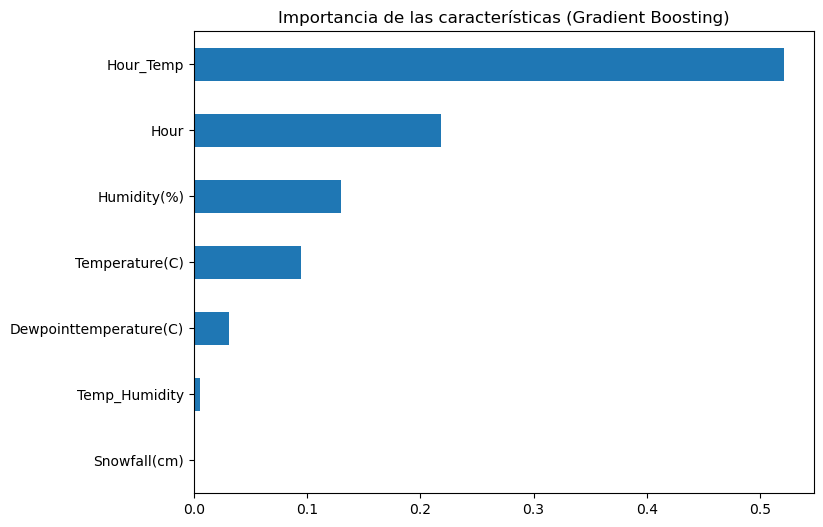

In [7]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear nuevas características (interacciones entre variables)
df['Temp_Humidity'] = df['Temperature(C)'] * df['Humidity(%)']
df['Hour_Temp'] = df['Hour'] * df['Temperature(C)']

# Verificar las columnas del DataFrame
print("Columnas en el DataFrame:")
print(df.columns)

# Definir las nuevas variables a incluir en el modelo
X = df[['Temperature(C)', 'Hour', 'Dewpointtemperature(C)', 'Snowfall(cm)', 'Humidity(%)', 'Temp_Humidity', 'Hour_Temp']]
y = df['RentedBikeCount']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
gbr.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba
y_pred_gbr = gbr.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f'Error cuadrático medio (Gradient Boosting): {mse_gbr}')

# Calcular el R² (R cuadrado)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f'R² (R cuadrado) (Gradient Boosting): {r2_gbr}')

# Mostrar la importancia de las características
feature_importances = pd.Series(gbr.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title("Importancia de las características (Gradient Boosting)")
plt.show()
